# Exercice 7

### Python code to solve the boundary value problem

Since $r=0$, $f=q=1$, the problem is reduced to: $-u^{"}(x)+u(x)=1$ then the numerical solution $v$ satisfied:
\begin{align*}
	\frac{-v_{j-1}+2v_{j}-v_{j+1}}{h^{2}}+v_{j}=1\quad \forall j=1,2,\dots,m
\end{align*}
Which implies that 
\begin{align*}
  v_{j-1}-(2+h^{2})v_{j}+v_{j+1}=-h^{2}
\end{align*}
Then we have the following system:
\begin{align*}
\begin{cases}
	v_{0}=1\\
	v_{0}-(2+h^{2})v_{1}+v_{2}=-h^{2}\\
	v_{1}-(2+h^{2})v_{2}+v_{3}=-h^{2}\\
	\qquad\qquad      \vdots\\
	v_{m-1}-(2+h^{2})v_{m}+v_{m+1}=-h^{2}\\
    v_{m+1}=0\\
\end{cases}	\implies \begin{pmatrix}
1 & 0 & 0 & \dots& 0 &0&0\\
1 & -(2+h^{2}) & 1 & \dots& 0&0&0 \\
0 &  1 & -(2+h^{2}) & \dots & 0&0& 0 \\
\vdots&\vdots&\vdots&\ddots&\vdots&\vdots&\vdots\\
0 & 0& 0 & \vdots & 1& -(2+h^{2}) &1\\
0 & 0 & 0 & \dots &0&0&1 \\
\end{pmatrix}\begin{pmatrix}
v_{0}\\
v_{1}\\
v_{2}\\
\vdots\\
v_{m}\\
v_{m+1}\\
\end{pmatrix}=\begin{pmatrix}
1\\
-h^{2}\\
-h^{2}\\
\vdots\\
-h^{2}\\
0\\
\end{pmatrix}
\end{align*}

Finally we deduced the numerical solution by:
\begin{align*}
\begin{pmatrix}
	v_{0}\\
	v_{1}\\
	v_{2}\\
	\vdots\\
	v_{m}\\
	v_{m+1}\\
\end{pmatrix}=\begin{pmatrix}
1 & 0 & 0 & \dots& 0 &0&0\\
1 & -(2+h^{2}) & 1 & \dots& 0&0&0 \\
0 &  1 & -(2+h^{2}) & \dots & 0&0& 0 \\
\vdots&\vdots&\vdots&\ddots&\vdots&\vdots&\vdots\\
0 & 0& 0 & \vdots & 1& -(2+h^{2}) &1\\
0 & 0 & 0 & \dots &0&0&1 \\
\end{pmatrix}^{-1}\begin{pmatrix}
1\\
-h^{2}\\
-h^{2}\\
\vdots\\
-h^{2}\\
0\\
\end{pmatrix}
\end{align*}


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

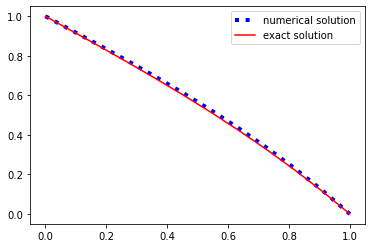

In [14]:
def f(h,v0,vm,a,b):
    m=int((b-a)/h+1)
    U=np.ones(m)
    R1=np.diag(U,1)+np.diag(U,-1)-2*np.identity(m+1)-h**2*np.identity(m+1)
    R2=R1[1:m]
    p=np.zeros(m)
    p1=np.insert(p,0,1)
    p2=np.insert(p,m,1)
    C1=np.insert(R2,0,p1,axis=0)
    C2=np.insert(C1,m,p2,axis=0)
    B=np.zeros((m+1,1))
    B[0]=v0
    B[-1]=vm
    for i in range(1,m):
        B[i]=-h**2
    return np.linalg.inv(C2)@B


#test of the code 
h=0.1
u=f(h,1,0,0,1)
x=np.linspace(0,1,int(1/h)+2)
t=1-np.sinh(x)/np.sinh(1)

plt.plot(x,u,'b:',lw=4)
plt.plot(x,t,'r')
plt.legend(['numerical solution','exact solution'])

## plot of the numerical solution using the previous code with different value of h

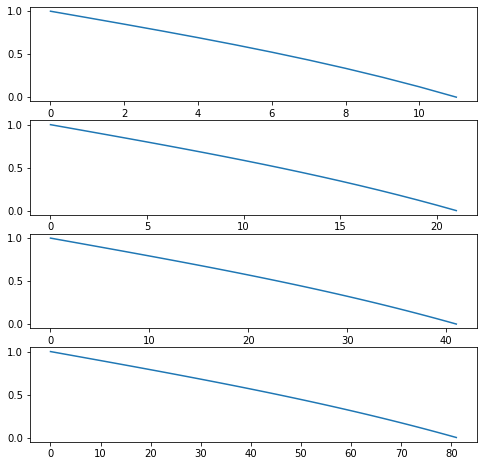

In [4]:
plt.figure(figsize=(8,8))
plt.subplot(4,1,1)
sol1=f(0.1,1,0,0,1)
plt.plot(sol1);

plt.subplot(4,1,2)
sol2=f(0.05,1,0,0,1)
plt.plot(sol2);

plt.subplot(4,1,3)
sol3=f(0.025,1,0,0,1)
plt.plot(sol3);

plt.subplot(4,1,4)
sol4=f(0.0125,1,0,0,1)
plt.plot(sol4);

## The plot of exact solution for differnt value of h

### We know that $h=\dfrac{b-a}{m-1}$ then we have $m=\dfrac{b-a}{h}+1$

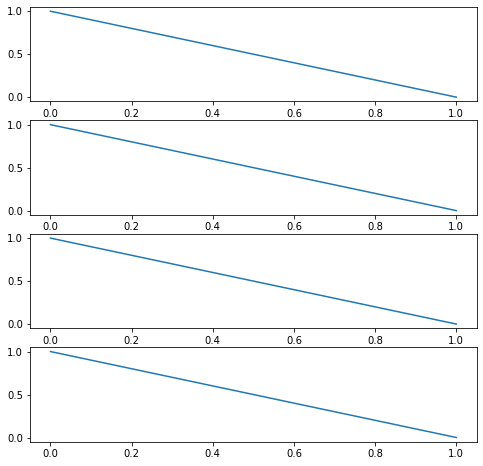

In [5]:
plt.figure(figsize=(8,8))
H=[0.1,0.05,0.025,0.0125]
a,b=0,1

for i in range(len(H)):
    x=np.linspace(0,1,int(b-a/H[i])+1)
    plt.subplot(len(H),1,1+i)
    t=1-np.sinh(x)/np.sinh(1)
    plt.plot(t)
 

## compute of the error for each h

In [7]:
H=[0.1,0.05,0.025,0.0125,0.001]

a,b=0,1
error=np.zeros(len(H))

for i in range(len(H)):
    x=np.linspace(0,1,int((b-a)/H[i])+2)
    t=1-np.sinh(x)/np.sinh(1)
    u=t.reshape(-1,1)
    sol=f(H[i],1,0,0,1)
    error[i]=max((abs(u-sol)).flatten())
    
for i in range(len(H)):    
    print('the error when h=',H[i],'is',error[i])

the error when h= 0.1 is 0.010784536883934603
the error when h= 0.05 is 0.005368117750932044
the error when h= 0.025 is 0.002670950102263314
the error when h= 0.0125 is 0.0013311437674791704
the error when h= 0.001 is 0.00010615732795804522
